In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

C:\Users\Miha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
bid = pd.read_csv('Data/Strani/izdelki_ebay_bid.csv')
bid = bid.drop_duplicates('Ime')
buy = pd.read_csv('Data/Strani/izdelki_ebay_buy.csv')
buy = buy.drop_duplicates('Ime')
vse = pd.concat([bid, buy]).drop_duplicates('Ime')

In [3]:
#izdelki_bid['Bids'].value_counts()
#izdelki_bid['Bids'].plot()

fixed_df = pd.read_csv('Data/Strani/izdelki_ebay_bid.csv', sep=',', encoding='UTF-8', parse_dates=['Cas'], dayfirst=True, index_col='Cas')
fixed_df[:3]
drzave = pd.read_csv('Data/Strani/izdelki_ebay_bid.csv', sep=',', encoding='UTF-8', parse_dates=['Drzava'], index_col='Drzava')
drzave = drzave.drop(['Cena_Buy', 'Buy'], axis=1)
drzave = drzave.drop_duplicates('Ime')
#Rezultati prikazani kot tabela sortirana po drzavi
imena = pd.read_csv('Data/Strani/izdelki_ebay_bid.csv', sep=',', encoding='UTF-8', parse_dates=['Ime'], index_col='Ime')
imena = imena.drop(['Cena_Buy', 'Buy'], axis=1)
imena = imena.drop_duplicates()
fixed_dg = pd.read_csv('Data/Strani/izdelki_ebay_buy.csv', sep=',', encoding='UTF-8', parse_dates=['Cas'], dayfirst=True, index_col='Cas')

# ANALIZA PODATKOV ZA 'BID'

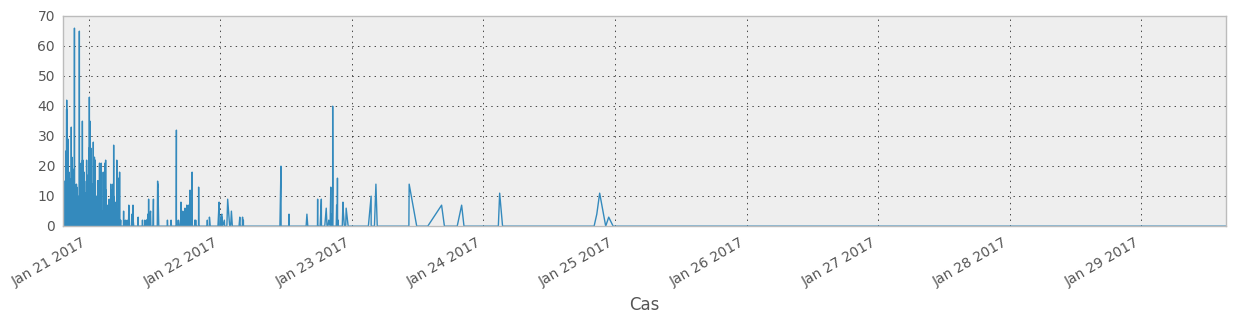

In [115]:
fixed_df['Bids'].plot() 

Tabela odvisnosti stevila ponudb od casa do prodaje izdelka. Najvec ponudb je tik preden se proda izdelek.

In [116]:
kitajski = bid[bid['Drzava'] == "China"]

In [117]:
kitajski_popularni = bid[(bid['Drzava'] == "China") & (bid['Bids'] != 0)]

In [118]:
kitajski_popularni.sort_values('Bids')[-5:].drop(['Cena_Buy','Buy','Cas'], axis=1)

,Ime,Cena_Bid,Bids,Drzava,Kategorija
15871,Replacement Banjo armrest For Tyler Banjo Zinc...,6.30,18,China,String
9402,New Universal LED USB Charger Doctor Voltage C...,8.89,20,China,Gadgets-Other-Electronics
9406,RDA Rack,5.00,21,China,Gadgets-Other-Electronics
7741,ABUNDANCE CRYSTAL MEDICINE BAG Pocket Size Dee...,15.26,22,China,Rocks-Fossils-Minerals
18899,Flame Warrior High Quality Harness for children,31.77,26,China,Outdoor-Toys-Structures


Najbolj popularni kitajski izdelki.

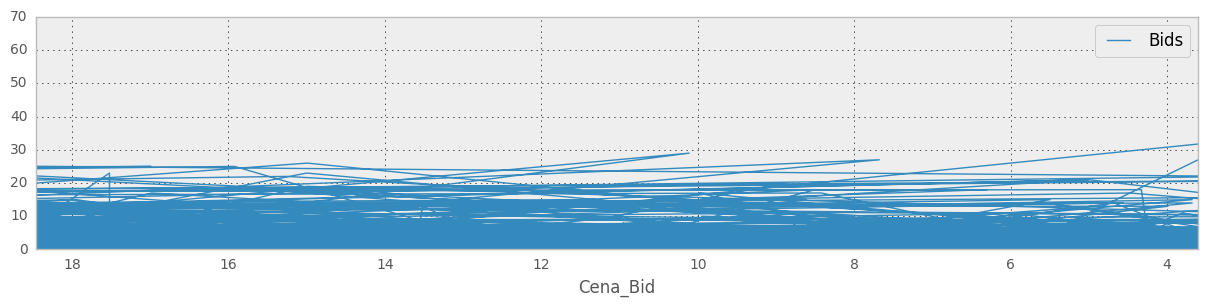

In [119]:
bid.plot(x='Cena_Bid', y='Bids') 

Ocitno ni povezave med stevilom ponudnikov in cene, ne da podatki sploh nudijo koristen graf.

In [120]:
kategorije_drage = bid.groupby('Kategorija').max().sort_values(by='Cena_Bid').drop(['Cena_Buy', 'Buy', 'Cas'
                                                                                   , 'Bids', 'Drzava'], axis=1)
a = pd.concat([kategorije_drage[:1],kategorije_drage[-1:]])
kategorije_poceni = bid.groupby('Kategorija').min().sort_values(by='Cena_Bid').drop(['Cena_Buy', 'Buy', 'Cas',
                                                                                    'Bids', 'Drzava'], axis=1)
b = pd.concat([kategorije_poceni[:1],kategorije_poceni[-1:]])
c = pd.concat([a, b])
c

,Ime,Cena_Bid
Kategorija,,
Printing-Personalization,Princess Sofia birthday Invitations custom per...,1.20
Decorative-Arts,small glass bottles,950.00
eBay-User-Tools,BLUE TECH eBay Listing Auction Template Smooth...,0.01
Motorcycles,Ducati Diavel Base,730.00


Printing-Personlization ima najmanjsi maksimum za 'Bid' izmed vseh kategorij, Decorative-Arts najvecji. eBay User Tools ima najcenejsi izdelek (oziroma eden izmed najcenejsih), Motorcycles je nasploh drag, saj njegov najcenejsi izdelek stane 730. dolarjev.

In [121]:
kategorije_povprecje = bid.groupby('Kategorija').mean().sort_values(by='Cena_Bid').drop(['Bids'
                                                                                        ], axis=1)
a1=kategorije_povprecje.loc['eBay-User-Tools']
a2=kategorije_povprecje.loc['Printing-Personalization']
a3=kategorije_povprecje.loc['Motorcycles']
a4=kategorije_povprecje.loc['Decorative-Arts']
pd.concat([a1,a2,a3,a4])

Cena_Bid     31.280833
Cena_Bid      1.200000
Cena_Bid    730.000000
Cena_Bid    174.523929
dtype: float64

Iz te tabele lahko sklepam, da ima motorcycles in printing personalization le en izdelek, decorative arts nima nasploh tako dragih izdelkov in eBay User Tools nima nasploh tako poceni izdelkov.

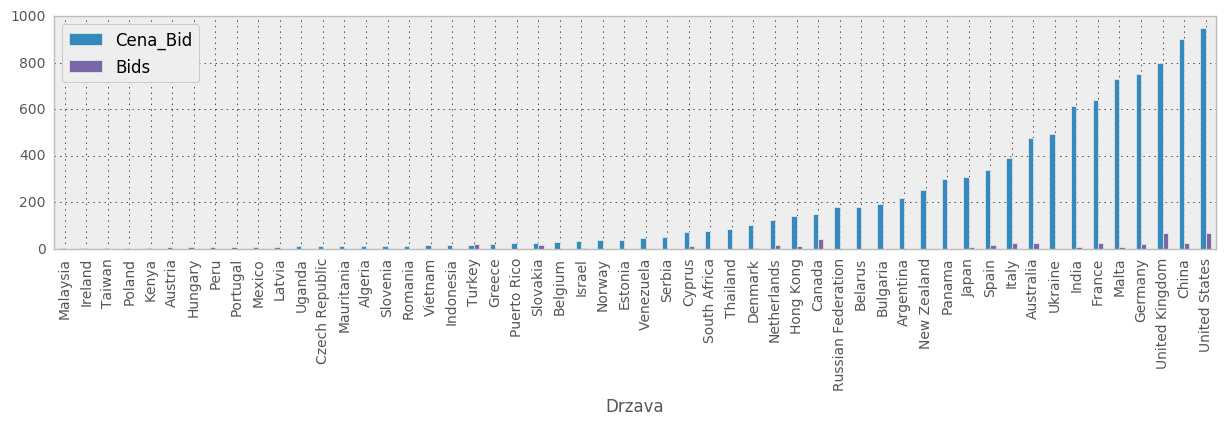

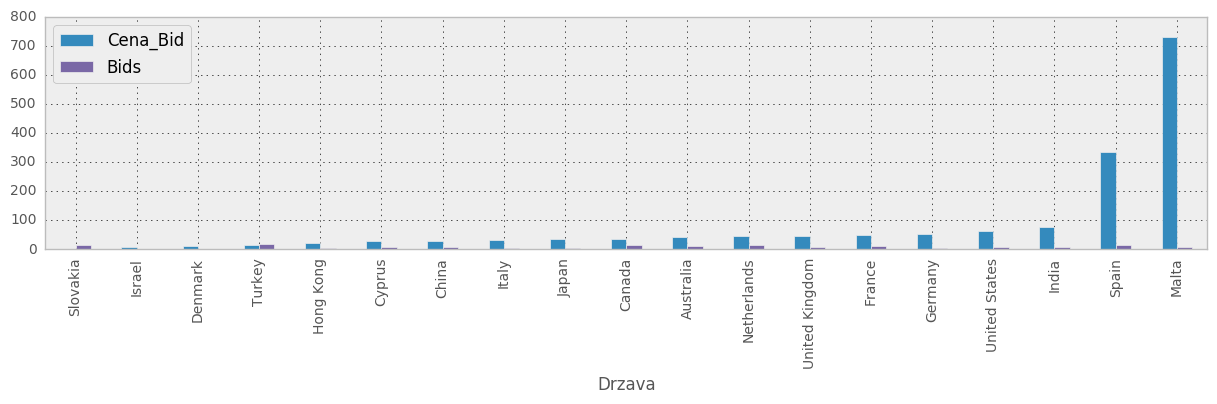

In [8]:
bid.groupby('Drzava').max().sort_values('Cena_Bid').plot.bar()
#Graf odvnisnosti dosezene cene drazbe in stevilom ponudb od drzave.
popularne = bid[(bid['Bids'] > 1)]
popularne.groupby('Drzava').mean().sort_values('Cena_Bid').plot.bar()
#Povprecna dosezena cena za drzave, ki imajo vec kot en izdelek na prodajo.

In [123]:
imena.sort_values("Bids")[-5:].drop(['Cas'], axis=1)
#5 izdelkov na "Bid" sistem, ki imajo najvec ponudnikov, ne glede na drzavo

,Cena_Bid,Bids,Drzava,Kategorija
Ime,,,,
Sony PlayStation VR Headset,440.00,40,United States,Virtual-Reality
Fine Old Chinese Kangxi Period Blue and White Porcelain Plate Charger Scholar,152.50,42,United States,Asian-Antiques
Nintendo WII console bundle,82.54,43,Canada,Video-Game-Consoles
AKG Wirless Mic System,800.00,65,United Kingdom,Pro-Audio-Equipment
lot of two old knifes,55.00,66,United States,Knives-Swords-Blades


In [124]:
imena.sort_values("Cena_Bid")[-5:].drop(['Cas'], axis=1)
#5 najdrazjih izdelkov na "Bid" sistem, ne glede na drzavo

,Cena_Bid,Bids,Drzava,Kategorija
Ime,,,,
saprano saxophone,850.00,0,United States,Vintage-Musical-Instruments
Antique Sterling Silver Christening Mug Art Deco Style Edward VIII,875.00,0,United States,Keepsakes-Baby-Announcements
Art Deco Bronze Sculpture of Elegant Lady Dancer,899.79,10,China,Decorative-Arts
Derek Jeter Game Used Autographed Batting Glove Steiner,899.99,16,United States,Game-Used-Memorabilia
Antique Sand Cast Bronze Plaque Crest Pointer Hunting Dog French Hunting Lodge,950.00,0,United States,Decorative-Arts


Drzava
Argentina                2
Latvia                   2
Slovakia                 2
Taiwan                   2
Romania                  2
Turkey                   2
Denmark                  3
New Zealand              3
Norway                   4
Russian Federation       4
Ukraine                  4
Estonia                  5
Belarus                  6
Cyprus                   6
Israel                   6
Netherlands              6
Bulgaria                 7
Greece                   7
Thailand                11
Spain                   16
Japan                   27
Hong Kong               37
Italy                   46
India                   47
Canada                  58
France                  72
Australia               91
Germany                 95
China                  294
United Kingdom         905
United States         2543
dtype: int64

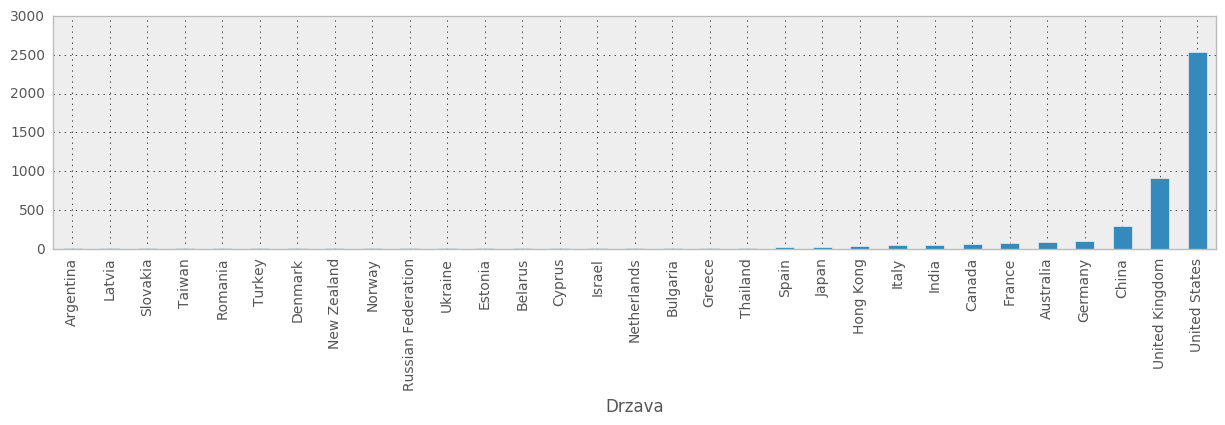

In [125]:
count = bid.groupby('Drzava').size() 
counts = count[count > 1]
counts.sort_values().plot.bar()
counts.sort_values()

Tabela in graf stevila izdelkov na ponudbo v drzavi, Slovenija, ki ni prikazana, ima en izdelek!

Ker je Ebay Ameriška internetna stran tudi ni presenetljivo, da je velika večina izdelkov iz Amerike.

# ANALIZA PODATKOV ZA 'BUY'

In [126]:
kategorije_drage_buy = buy.groupby('Kategorija').max().sort_values(by='Cena_Buy').drop(['Cena_Bid', 'Buy', 'Cas'
                                                                                   , 'Bids', 'Drzava'], axis=1)
d = pd.concat([kategorije_drage_buy[:1],kategorije_drage_buy[-1:]])
kategorije_poceni_buy = buy.groupby('Kategorija').min().sort_values(by='Cena_Buy').drop(['Cena_Bid', 'Buy', 'Cas',
                                                                                    'Bids', 'Drzava'], axis=1)
e = pd.concat([kategorije_poceni_buy[:1],kategorije_poceni_buy[-1:]])
f = pd.concat([d, e])
f

,Ime,Cena_Buy
Kategorija,,
Replacement-Parts-Tools,Camera Release Shutter Button Red Flat for Lei...,1.39
Musical-Instruments-Pre-1930,mandolin bowl back for restoration,999.99
Manuals-Resources,My Baby Record Book in Blue with Traditional N...,0.01
Motorcycles,Ducati Diavel Base,730.00


In [127]:
kategorije_pov_buy =  buy.groupby('Kategorija').mean().sort_values(by='Cena_Buy'); kategorije_pov_buy
#Tu se lahko opazi, da edini izdelek, ki se prodaja pri Motorcycles deluje na dražbo in na takojšnjo kupčijo

,Cena_Buy
Kategorija,
Replacement-Parts-Tools,1.390000
Paper-Money-World,1.590000
Manuals-Resources,1.623333
Beads-Jewelry-Making,2.616667
Coins-US,3.090000
Coupons,3.204000
Loose-Beads,3.950000
Collectible-Card-Games,4.267143
Packing-Shipping,4.280000


In [128]:
g = buy[buy['Kategorija'] == 'Motorcycles']
h = bid[bid['Kategorija'] == 'Motorcycles']
i = pd.concat([g, h]); i

,Ime,Cena_Bid,Bids,Cena_Buy,Buy,Cas,Drzava,Kategorija
14482,Ducati Diavel Base,None,None,730,Buy It Now,2017-01-21 17:08:52,Malta,Motorcycles
11493,Ducati Diavel Base,730,8,None,None,2017-01-21 16:48:48,Malta,Motorcycles


To je tisti en izdelek v najdrazji kategoriji. Zaradi mojega nacina zbiranja podatkov se pojavi v obeh tabelah podatkov enkrat.

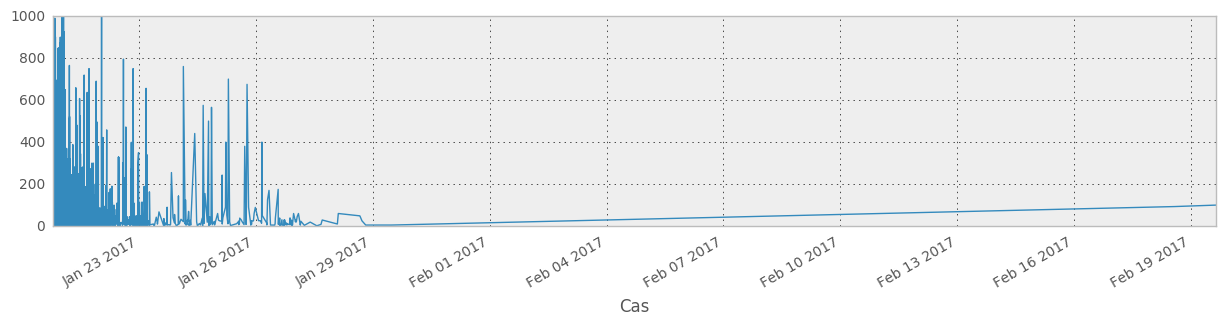

In [129]:
fixed_dg['Cena_Buy'].plot() 
#Izkaze se, da je cena za "Buy now" visja, blizja je k zakljucku prodaje.

In [130]:
fixed_dg.sort_values('Cena_Buy').drop(['Cena_Bid', 'Bids', 'Kategorija', 'Buy'], axis=1).drop_duplicates()
#Tabela razvrscena po ceni, najvecja vrednost je $999.99 za MEXICAN SHAMANIC MARACAS SHAKERS LATINE ETHNIC...
#iz Avstrije in najcenejsa, oziroma ena izmed najcenejsih je $0.01 za plenice iz Kitajske.

,Ime,Cena_Buy,Drzava
Cas,,,
2017-01-20 20:23:50,Bourjois Makeup Brush,0.01,United States
2017-01-21 00:51:26,Gentec Single Stage Regulator LP,0.01,China
2017-01-21 00:58:41,Blue Kids Gift Portable Plastic Binocular Tele...,0.01,Australia
2017-01-21 00:53:45,Bracelet bending bar for making Hand Stamped C...,0.01,China
2017-01-20 20:07:13,Beautifully Chinese bamboo Hand carving snuff ...,0.01,United Kingdom
2017-01-21 21:19:28,TALKING PICTURE FRAME,0.01,Ukraine
2017-01-23 15:17:01,UNICORN DREAMS ebay Auction Listing Template F...,0.01,United States
2017-01-20 20:42:37,Baby Toy Comforter Blanket Mothercare Rabbit R...,0.01,United Kingdom
2017-01-20 20:20:56,Casetta Little Person fisher Price,0.01,China


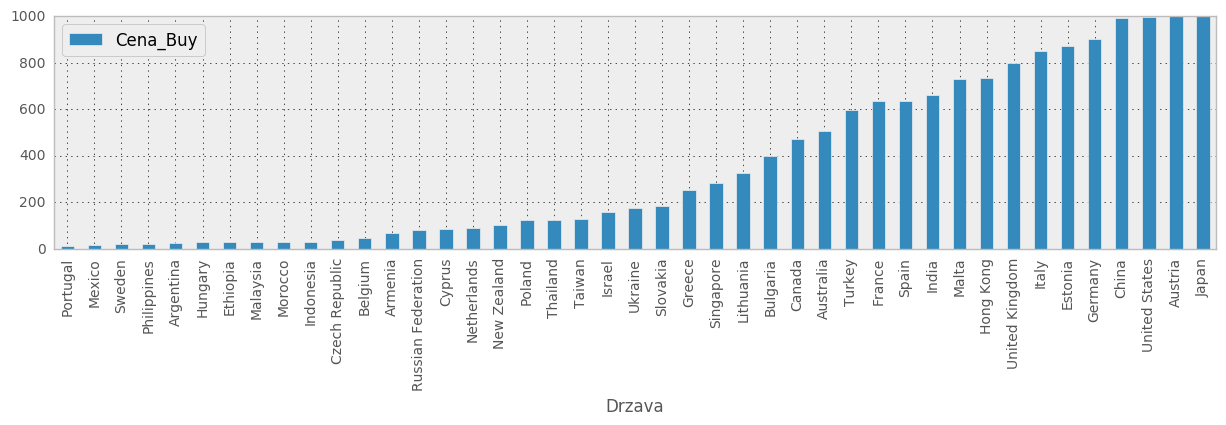

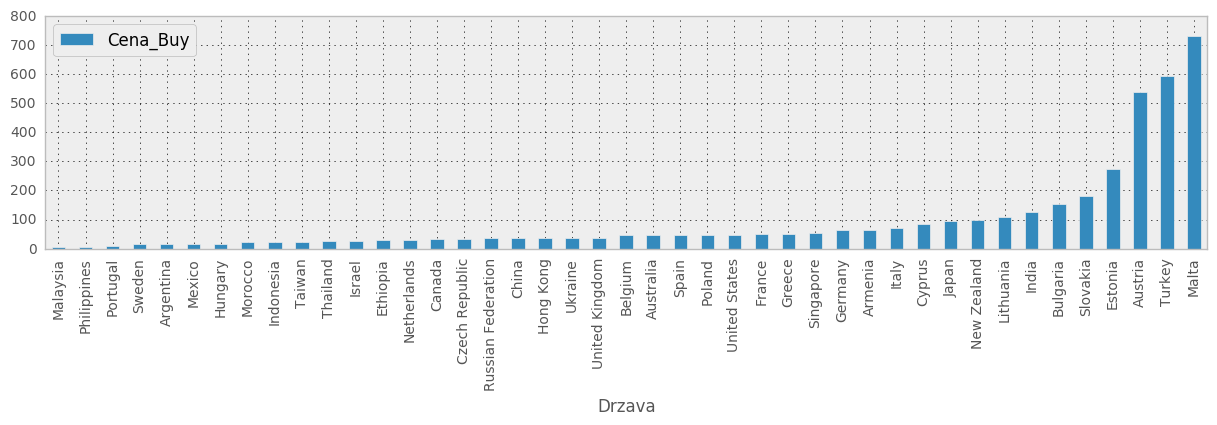

In [11]:
buy.groupby('Drzava').max().sort_values('Cena_Buy').plot.bar()
#Graf odvnisnosti dosezene cene drazbe in stevilom ponudb od drzave.
buy.groupby('Drzava').mean().sort_values('Cena_Buy').plot.bar()
#Povprecna dosezena cena za drzave.
#V primerjavi z 'Bid' so vse cene visje.

Drzava
Austria                  2
Czech Republic           2
Sweden                   2
Indonesia                3
Bulgaria                 3
Russian Federation       3
Poland                   3
Morocco                  3
Estonia                  4
Netherlands              4
Philippines              5
Lithuania                5
Portugal                 5
Argentina                6
Greece                   8
Ukraine                 11
Hungary                 12
Singapore               13
Israel                  19
Taiwan                  20
Thailand                24
Malaysia                28
India                   35
Japan                   67
Spain                   71
Canada                  78
France                  79
Italy                  128
Australia              189
Hong Kong              225
Germany                302
China                  368
United Kingdom         728
United States         3659
dtype: int64

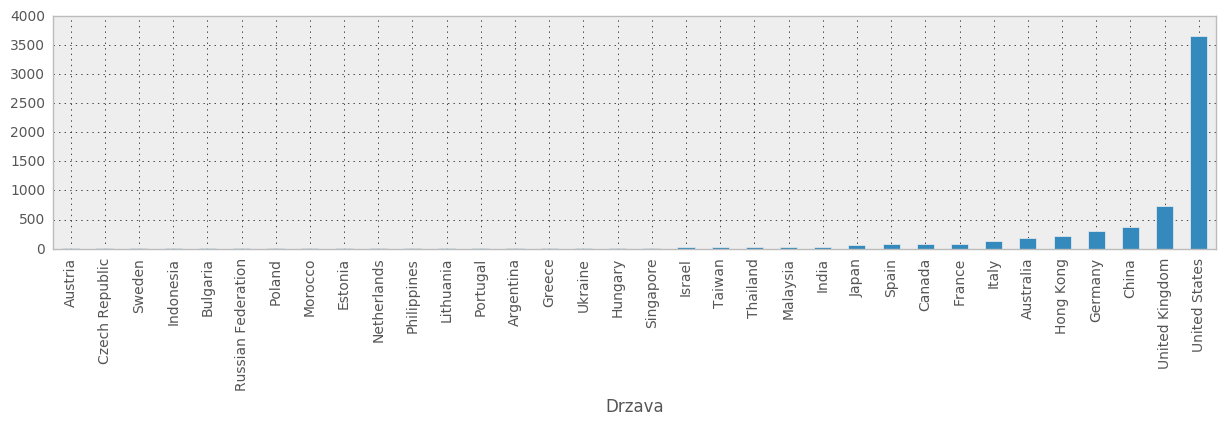

In [137]:
count = buy.groupby('Drzava').size() 
counts = count[count > 1]
counts.sort_values().plot.bar()
counts.sort_values()
#Isto, le za 'Buy now' sistem, Amerika prodaja vecino izdelkov. Ni bistvene spremembe v rezultatih.

# ANALIZA PODATKOV ZA 'BID' in 'BUY'

Drzava
Slovakia                 2
Romania                  2
Austria                  2
Poland                   2
Czech Republic           2
Latvia                   2
Indonesia                2
Sweden                   2
Philippines              3
Turkey                   3
New Zealand              3
Denmark                  3
Norway                   4
Argentina                4
Ukraine                  5
Russian Federation       6
Belarus                  6
Estonia                  6
Cyprus                   7
Singapore                8
Bulgaria                 8
Greece                   8
Hungary                  9
Netherlands              9
Taiwan                  12
Thailand                19
Israel                  21
Malaysia                21
Spain                   47
Japan                   59
India                   62
Canada                  90
Italy                  104
France                 116
Hong Kong              164
Australia              188
Germany              

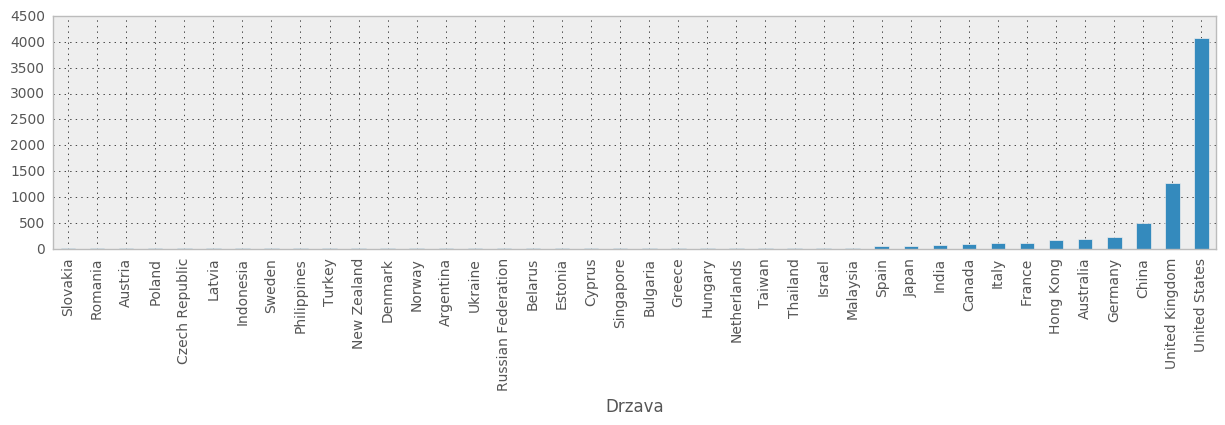

In [142]:
count = vse.groupby('Drzava').size() 
counts = count[count > 1]
counts.sort_values().plot.bar()
counts.sort_values()
#Isto, le za "Buy" in "Bid", rezultati so isti kot prej, Amerika ima najvec izdelkov na Ebayu.